In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta as td
from calendar import monthrange as mrng
%matplotlib inline

A continuacion veremos la cantidad de preguntas en StackExchange con tags o titulos que incluyan Haskell, basados en el sistema de [Query](https://data.stackexchange.com/stackoverflow/query/edit/740338#resultSets)

In [47]:
def dfQuery(csv_):
    rddSE = spark.read.option("header","false").csv(csv_).rdd
    rddSE = rddSE.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d %H:%M:%S"),x[1]))
    rddSE = rddSE.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
    rddSE = rddSE.reduceByKey(lambda x,y: x+y)
    rddSE = rddSE.map(lambda x: (x[0][0],x[0][1],x[1]))
    rddSE = rddSE.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
    dfSE = rddSE.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])
    return dfSE

In [58]:
dfSE_Haskell = dfQuery("./QueryResultsHaskell.csv")
dfSE_OCaml = dfQuery("./QueryResultsOCaml.csv")
dfSE_Scala = dfQuery("./QueryResultsScala.csv")
dfSE_Clojure = dfQuery("./QueryResultsClojure.csv")
dfSE_FSharp = dfQuery("./QueryResultsF#.csv")
dfSE_Elm = dfQuery("./QueryResultsElm.csv")

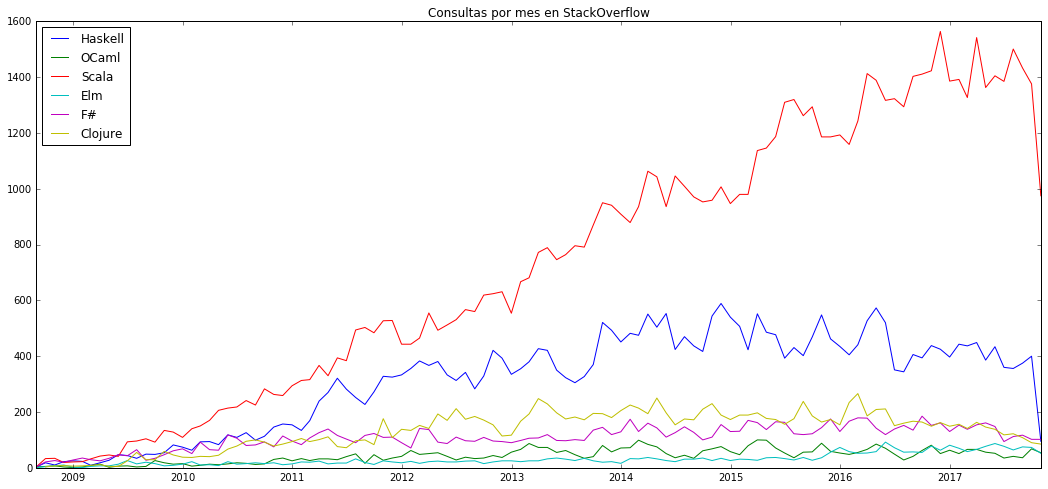

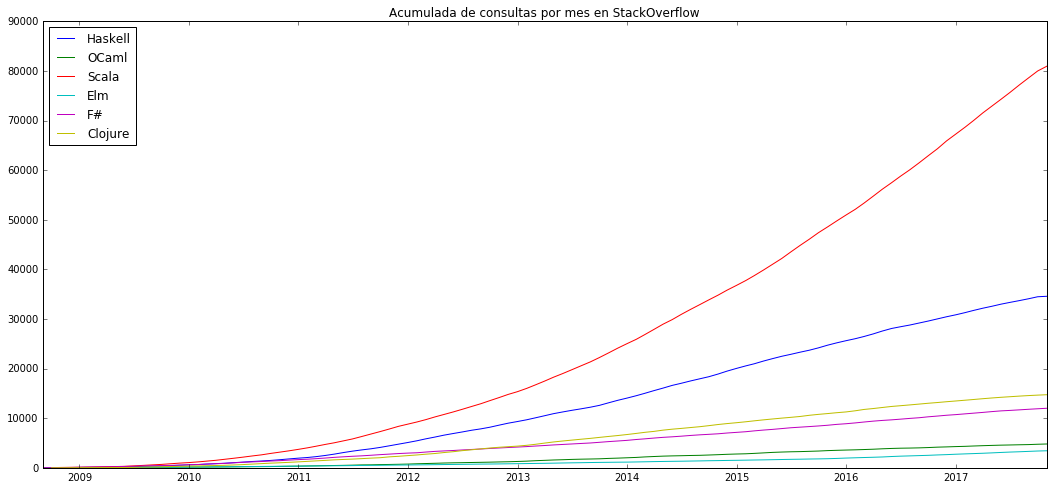

In [60]:
fig = plt.figure(figsize=(18,8))
plt.plot(dfSE_Haskell.fecha,dfSE_Haskell.cant,label='Haskell')
plt.plot(dfSE_OCaml.fecha,dfSE_OCaml.cant,label='OCaml')
plt.plot(dfSE_Scala.fecha,dfSE_Scala.cant,label='Scala')
plt.plot(dfSE_Elm.fecha,dfSE_Elm.cant,label='Elm')
plt.plot(dfSE_FSharp.fecha,dfSE_FSharp.cant,label='F#')
plt.plot(dfSE_Clojure.fecha,dfSE_Clojure.cant,label='Clojure')
plt.legend(loc='best')
plt.title('Consultas por mes en StackOverflow')

fig = plt.figure(figsize=(18,8))
plt.plot(dfSE_Haskell.fecha,np.cumsum(dfSE_Haskell.cant),label='Haskell')
plt.plot(dfSE_OCaml.fecha,np.cumsum(dfSE_OCaml.cant),label='OCaml')
plt.plot(dfSE_Scala.fecha,np.cumsum(dfSE_Scala.cant),label='Scala')
plt.plot(dfSE_Elm.fecha,np.cumsum(dfSE_Elm.cant),label='Elm')
plt.plot(dfSE_FSharp.fecha,np.cumsum(dfSE_FSharp.cant),label='F#')
plt.plot(dfSE_Clojure.fecha,np.cumsum(dfSE_Clojure.cant),label='Clojure')
plt.legend(loc='best')
plt.title('Acumulada de consultas por mes en StackOverflow')

plt.show()

In [38]:
def dfLang(csv_):
    rdd = spark.read.option("header","false").csv(csv_).rdd
    rdd = rdd.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d"),x[1]))
    rdd = rdd.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
    rdd = rdd.reduceByKey(lambda x,y: x+y)
    rdd = rdd.map(lambda x: (x[0][0],x[0][1],x[1]))
    rdd = rdd.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
    df = rdd.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])
    return df

In [45]:
dfGH = dfLang("./Haskell_2007-01-01_2017-10-13.csv")
dfELM = dfLang("./Elm_2007-01-01_2017-10-19.csv")
dfCLO = dfLang("./Clojure_2007-01-01_2017-10-19.csv")
dfFSP = dfLang("./F#_2007-01-01_2017-10-19.csv")
dfOCM = dfLang("./OCaml_2007-01-01_2017-10-20.csv")
dfSCA = dfLang("./Scala_2007-01-01_2017-10-22.csv")

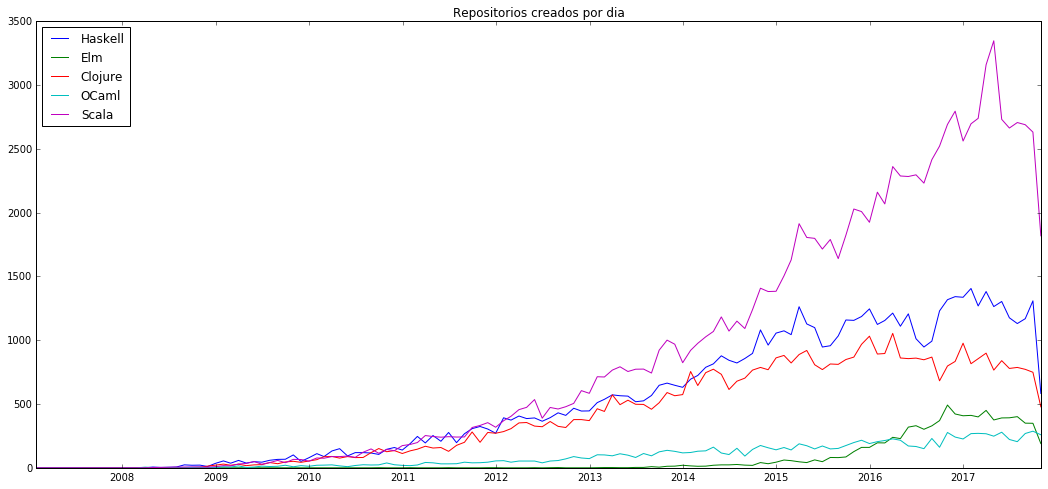

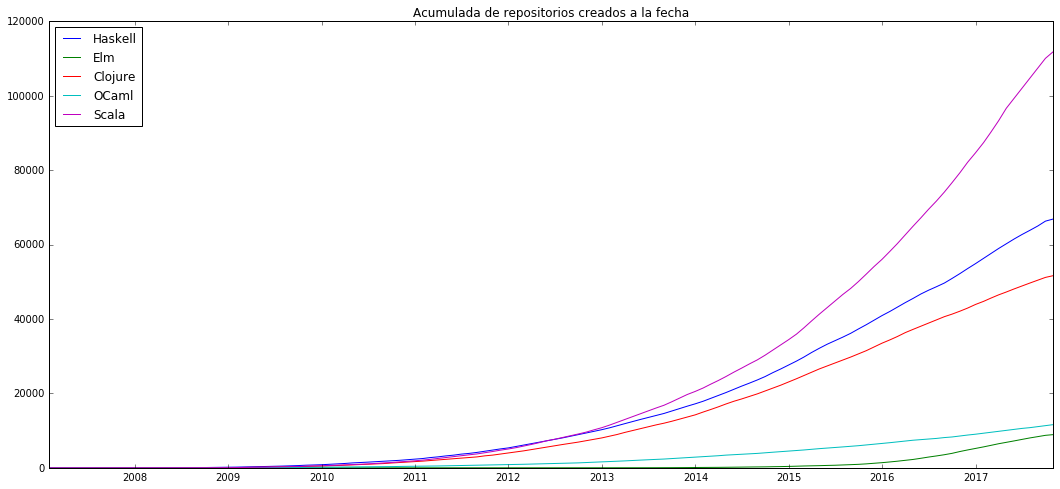

In [46]:
fig = plt.figure(figsize=(18,8))
plt.plot(dfGH.fecha,dfGH.cant,label='Haskell')
plt.plot(dfELM.fecha,dfELM.cant,label='Elm')
plt.plot(dfCLO.fecha,dfCLO.cant,label='Clojure')
#plt.plot(dfFSP.fecha,dfFSP.cant,label='F#')
plt.plot(dfOCM.fecha,dfOCM.cant,label='OCaml')
plt.plot(dfSCA.fecha,dfSCA.cant,label='Scala')
plt.legend(loc='best')
plt.title('Repositorios creados por dia')

fig = plt.figure(figsize=(18,8))
plt.plot(dfGH.fecha,np.cumsum(dfGH.cant),label='Haskell')
plt.plot(dfELM.fecha,np.cumsum(dfELM.cant),label='Elm')
plt.plot(dfCLO.fecha,np.cumsum(dfCLO.cant),label='Clojure')
#plt.plot(dfFSP.fecha,np.cumsum(dfFSP.cant),label='F#')
plt.plot(dfOCM.fecha,np.cumsum(dfOCM.cant),label='OCaml')
plt.plot(dfSCA.fecha,np.cumsum(dfSCA.cant),label='Scala')
plt.legend(loc='best')
plt.title('Acumulada de repositorios creados a la fecha')

plt.show()